In [7]:
import pandas as pd
df = pd.read_csv('data/SMSSpamCollection.csv', delimiter='\t', header=None)
print(df.head())
print('Number of spam messages:', df[df[0] == 'spam'][0].count())
print('Number of ham messages:', df[df[0] == 'ham'][0].count())
df.describe()

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Number of spam messages: 747
Number of ham messages: 4825


,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [49]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

df = pd.read_csv('data/SMSSpamCollection.csv', delimiter='\t', header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

for i, prediction in enumerate(predictions[:5]):
    print(prediction)
    #print('Prediction: %s . Message: %s' % (prediction, X_test_raw[i]))


spam
ham
ham
ham
ham


[[4 1]
 [2 3]]


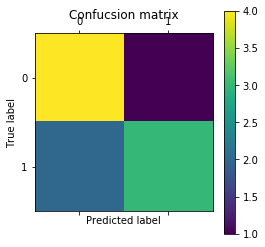

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confucsion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score
y_pred, y_true = [0,1,1,0], [1,1,1,1]
print('Accuracy:', accuracy_score(y_true, y_pred))

Accuracy: 0.5


In [55]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

df = pd.read_csv('data/SMSSpamCollection.csv', delimiter='\t', header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

In [62]:
import pandas as pd
df = pd.read_csv('data/train.tsv', header=0, delimiter='\t')
print(df.count())
print(df.head())
print(df['Phrase'].head(10))
print(df['Sentiment'].describe())
print(df['Sentiment'].value_counts())

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64
   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
5    of escapades demonstrating the adage that what...
6             

In [64]:
print(df['Sentiment'].value_counts()/df['Sentiment'].count())

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64


In [70]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

def main():
    pipeline = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', LogisticRegression())
    ])
    parameters = {
        'vect__max_df': (0.25, 0.5),
        'vect__ngram_range': ((1,1), (1,2)),
        'vect__use_idf': (True, False),
        'clf__c': (0.1, 1, 10),
    }
    df = pd.read_csv('data/train.tsv', header=0, delimiter='\t')
    X, y = df['Phrase'], df['Sentiment'].as_matrix()
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=3, verbose=1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    #print('Best score: %0.3f' % grid_search.best_score_)
    #print('Best paramenters set:')
   # best_parameters = grid_search.best_estimator_.get_params()
   # for param_name in sorted(parameters.kerys()):
   #     print('\t%s: %r' % (param_name, best_parameters[param_name]))
main()

Fitting 3 folds for each of 24 candidates, totalling 72 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/local/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.5/site-packages/ipykernel/__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/usr/local/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7fbb04abf810, file "/...3.5/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.5/site-packages/ipykernel/__pycache__/__main__.cpython-35.pyc', '__doc__': None, '__file__': '/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.5/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.5/site-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fbb04abf810, file "/...3.5/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.5/site-packages/ipykernel/__pycache__/__main__.cpython-35.pyc', '__doc__': None, '__file__': '/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.5/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/usr/local/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/usr/local/lib/python3.5/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/usr/local/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/usr/local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/usr/local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/local/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'import pandas as pd\nfrom sklearn.feature_extract...(param_name, best_parameters[param_name]))\nmain()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 14, 7, 22, 19, 524325, tzinfo=tzutc()), 'msg_id': '2B75AEB60A3641478A467214F3666A03', 'msg_type': 'execute_request', 'session': '6BE611298BFF418C86DADA8E26923FA4', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '2B75AEB60A3641478A467214F3666A03', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'6BE611298BFF418C86DADA8E26923FA4']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'import pandas as pd\nfrom sklearn.feature_extract...(param_name, best_parameters[param_name]))\nmain()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 14, 7, 22, 19, 524325, tzinfo=tzutc()), 'msg_id': '2B75AEB60A3641478A467214F3666A03', 'msg_type': 'execute_request', 'session': '6BE611298BFF418C86DADA8E26923FA4', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '2B75AEB60A3641478A467214F3666A03', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'6BE611298BFF418C86DADA8E26923FA4'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'import pandas as pd\nfrom sklearn.feature_extract...(param_name, best_parameters[param_name]))\nmain()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 14, 7, 22, 19, 524325, tzinfo=tzutc()), 'msg_id': '2B75AEB60A3641478A467214F3666A03', 'msg_type': 'execute_request', 'session': '6BE611298BFF418C86DADA8E26923FA4', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '2B75AEB60A3641478A467214F3666A03', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/usr/local/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='import pandas as pd\nfrom sklearn.feature_extract...(param_name, best_parameters[param_name]))\nmain()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'import pandas as pd\nfrom sklearn.feature_extract...(param_name, best_parameters[param_name]))\nmain()'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/usr/local/lib/python3.5/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('import pandas as pd\nfrom sklearn.feature_extract...(param_name, best_parameters[param_name]))\nmain()',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('import pandas as pd\nfrom sklearn.feature_extract...(param_name, best_parameters[param_name]))\nmain()',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='import pandas as pd\nfrom sklearn.feature_extract...(param_name, best_parameters[param_name]))\nmain()', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Import object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.FunctionDef object>, <_ast.Expr object>], cell_name='<ipython-input-70-a7a1dbf8814a>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fbac372e160, executi..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fbab1aa8f60, file "<ipython-input-70-a7a1dbf8814a>", line 30>
        result = <ExecutionResult object at 7fbac372e160, executi..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fbab1aa8f60, file "<ipython-input-70-a7a1dbf8814a>", line 30>, result=<ExecutionResult object at 7fbac372e160, executi..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fbab1aa8f60, file "<ipython-input-70-a7a1dbf8814a>", line 30>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', "import pandas as pd\ndf = pd.read_csv('data/SMSSp...n', delimiter='\\t', header=None)\nprint(df.head())", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...v', delimiter='\\t', header=None)\nprint(df.head())", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...of ham messages:', df[df[0] == 'ham'][0].count())", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...es:', df[df[0] == 'ham'][0].count())\ndf.decribe()", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...s:', df[df[0] == 'ham'][0].count())\ndf.describe()", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...es:', df[df[0] == 'ham'][0].count())\ndf.summary()", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...s:', df[df[0] == 'ham'][0].count())\ndf.describe()", 'import numpy as np\nimport pandas as pd\nfrom skle..._raw, y_test_raw = train_test_split(df[1], df[0])', 'import numpy as np\nimport pandas as pd\nfrom skle...in_raw)\nX_test = vectorizer.transform(X_test_raw)', 'import numpy as np\nimport pandas as pd\nfrom skle...sticRegression()\nclassifier.fit(X_train, y_train)', 'import numpy as np\nimport pandas as pd\nfrom skle...sticRegression()\nclassifier.fit(X_train, y_train)', "import numpy as np\nimport pandas as pd\nfrom skle... %s . Message: %s' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle... %s . Message: %s' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle... %s . Message: %s' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle... %s . Message: %s' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle...nt('Prediction: %s . Message: %s' % (prediction))", "import numpy as np\nimport pandas as pd\nfrom skle...print('Prediction: %s . Message:' % (prediction))", "import numpy as np\nimport pandas as pd\nfrom skle...on: %s . Message:' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle...on: %s . Message:' % (prediction, X_test_raw[0]))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5:            0                       1
count   557...l call later
freq    4825                      30, 7:            0                       1
count   557...l call later
freq    4825                      30, 11: LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), 42: 3878    Sorry sir, i will call you tomorrow.  se...DID U AVE GOOD HOLIDAY?...
Name: 1, dtype: object, 59:    PhraseId  SentenceId                         ... 2  
2          2  
3          2  
4          2  }, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'X_test': <1393x7447 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 'X_test_raw': 4597    Carlos is down but I have to pick it up ...o please you both insid...
Name: 1, dtype: object, 'X_train': <4179x7447 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 'X_train_raw': 997     Yetunde i'm in class can you not run wat...hat happened in interview?
Name: 1, dtype: object, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', "import pandas as pd\ndf = pd.read_csv('data/SMSSp...n', delimiter='\\t', header=None)\nprint(df.head())", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...v', delimiter='\\t', header=None)\nprint(df.head())", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...of ham messages:', df[df[0] == 'ham'][0].count())", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...es:', df[df[0] == 'ham'][0].count())\ndf.decribe()", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...s:', df[df[0] == 'ham'][0].count())\ndf.describe()", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...es:', df[df[0] == 'ham'][0].count())\ndf.summary()", "import pandas as pd\ndf = pd.read_csv('data/SMSSp...s:', df[df[0] == 'ham'][0].count())\ndf.describe()", 'import numpy as np\nimport pandas as pd\nfrom skle..._raw, y_test_raw = train_test_split(df[1], df[0])', 'import numpy as np\nimport pandas as pd\nfrom skle...in_raw)\nX_test = vectorizer.transform(X_test_raw)', 'import numpy as np\nimport pandas as pd\nfrom skle...sticRegression()\nclassifier.fit(X_train, y_train)', 'import numpy as np\nimport pandas as pd\nfrom skle...sticRegression()\nclassifier.fit(X_train, y_train)', "import numpy as np\nimport pandas as pd\nfrom skle... %s . Message: %s' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle... %s . Message: %s' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle... %s . Message: %s' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle... %s . Message: %s' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle...nt('Prediction: %s . Message: %s' % (prediction))", "import numpy as np\nimport pandas as pd\nfrom skle...print('Prediction: %s . Message:' % (prediction))", "import numpy as np\nimport pandas as pd\nfrom skle...on: %s . Message:' % (prediction, X_test_raw[i]))", "import numpy as np\nimport pandas as pd\nfrom skle...on: %s . Message:' % (prediction, X_test_raw[0]))", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5:            0                       1
count   557...l call later
freq    4825                      30, 7:            0                       1
count   557...l call later
freq    4825                      30, 11: LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), 42: 3878    Sorry sir, i will call you tomorrow.  se...DID U AVE GOOD HOLIDAY?...
Name: 1, dtype: object, 59:    PhraseId  SentenceId                         ... 2  
2          2  
3          2  
4          2  }, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'X_test': <1393x7447 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 'X_test_raw': 4597    Carlos is down but I have to pick it up ...o please you both insid...
Name: 1, dtype: object, 'X_train': <4179x7447 sparse matrix of type '<class 'numpy.... stored elements in Compressed Sparse Row format>, 'X_train_raw': 997     Yetunde i'm in class can you not run wat...hat happened in interview?
Name: 1, dtype: object, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/home/likewise-open/FRAMGIA/sreang.rathanak/MachineLearning/MachineLearning/learning lib/Sk-learn/<ipython-input-70-a7a1dbf8814a> in <module>()
     25     #print('Best score: %0.3f' % grid_search.best_score_)
     26     #print('Best paramenters set:')
     27    # best_parameters = grid_search.best_estimator_.get_params()
     28    # for param_name in sorted(parameters.kerys()):
     29    #     print('\t%s: %r' % (param_name, best_parameters[param_name]))
---> 30 main()
     31 
     32 
     33 
     34 

...........................................................................
/home/likewise-open/FRAMGIA/sreang.rathanak/MachineLearning/MachineLearning/learning lib/Sk-learn/<ipython-input-70-a7a1dbf8814a> in main()
     19     }
     20     df = pd.read_csv('data/train.tsv', header=0, delimiter='\t')
     21     X, y = df['Phrase'], df['Sentiment'].as_matrix()
     22     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
     23     grid_search = GridSearchCV(pipeline, parameters, n_jobs=3, verbose=1, scoring='accuracy')
---> 24     grid_search.fit(X_train, y_train)
     25     #print('Best score: %0.3f' % grid_search.best_score_)
     26     #print('Best paramenters set:')
     27    # best_parameters = grid_search.best_estimator_.get_params()
     28    # for param_name in sorted(parameters.kerys()):

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...jobs', refit=True, scoring='accuracy', verbose=1), X=16811                                       Crik...ppened only yesterday
Name: Phrase, dtype: object, y=array([2, 2, 2, ..., 3, 2, 2]))
    824         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    825             Target relative to X for classification or regression;
    826             None for unsupervised learning.
    827 
    828         """
--> 829         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...obs', refit=True, scoring='accuracy', verbose=1)>
        X = 16811                                       Crik...ppened only yesterday
Name: Phrase, dtype: object
        y = array([2, 2, 2, ..., 3, 2, 2])
        self.param_grid = {'clf__c': (0.1, 1, 10), 'vect__max_df': (0.25, 0.5), 'vect__ngram_range': ((1, 1), (1, 2)), 'vect__use_idf': (True, False)}
    830 
    831 
    832 class RandomizedSearchCV(BaseSearchCV):
    833     """Randomized search on hyper parameters.

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=None, error_score='raise',
     ...jobs', refit=True, scoring='accuracy', verbose=1), X=16811                                       Crik...ppened only yesterday
Name: Phrase, dtype: object, y=array([2, 2, 2, ..., 3, 2, 2]), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    568         )(
    569             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    570                                     train, test, self.verbose, parameters,
    571                                     self.fit_params, return_parameters=True,
    572                                     error_score=self.error_score)
--> 573                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    574                 for train, test in cv)
    575 
    576         # Out is a list of triplet: score, estimator, n_test_samples
    577         n_fits = len(out)

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=3), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=3)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Jul 14 14:22:19 2017
PID: 22135                             Python 3.5.3: /usr/local/bin/python3
...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), 16811                                       Crik...ppened only yesterday
Name: Phrase, dtype: object, array([2, 2, 2, ..., 3, 2, 2]), make_scorer(accuracy_score), array([25437, 25457, 25488, ..., 78027, 78028, 78029]), array([    0,     1,     2, ..., 27129, 27139, 27143]), 1, {'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), 16811                                       Crik...ppened only yesterday
Name: Phrase, dtype: object, array([2, 2, 2, ..., 3, 2, 2]), make_scorer(accuracy_score), array([25437, 25457, 25488, ..., 78027, 78028, 78029]), array([    0,     1,     2, ..., 27129, 27139, 27143]), 1, {'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py in _fit_and_score(estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), X=16811                                       Crik...ppened only yesterday
Name: Phrase, dtype: object, y=array([2, 2, 2, ..., 3, 2, 2]), scorer=make_scorer(accuracy_score), train=array([25437, 25457, 25488, ..., 78027, 78028, 78029]), test=array([    0,     1,     2, ..., 27129, 27139, 27143]), verbose=1, parameters={'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1649     fit_params = fit_params if fit_params is not None else {}
   1650     fit_params = dict([(k, _index_param_value(X, v, train))
   1651                       for k, v in fit_params.items()])
   1652 
   1653     if parameters is not None:
-> 1654         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(st....0001,
          verbose=0, warm_start=False))])>
        parameters = {'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True}
   1655 
   1656     start_time = time.time()
   1657 
   1658     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/pipeline.py in set_params(self=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), **kwargs={'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True})
    175 
    176         Returns
    177         -------
    178         self
    179         """
--> 180         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BasePipeline._set_params of Pipel....0001,
          verbose=0, warm_start=False))])>
        kwargs = {'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True}
    181         return self
    182 
    183     def _validate_steps(self):
    184         names, estimators = zip(*self.steps)

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/pipeline.py in _set_params(self=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), steps_attr='steps', **params={'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True})
     64         step_names, _ = zip(*getattr(self, steps_attr))
     65         for name in list(six.iterkeys(params)):
     66             if '__' not in name and name in step_names:
     67                 self._replace_step(steps_attr, name, params.pop(name))
     68         # 3. Step parameters and other initilisation arguments
---> 69         super(_BasePipeline, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(st....0001,
          verbose=0, warm_start=False))])>
        params = {'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True}
     70         return self
     71 
     72     def _validate_names(self, names):
     73         if len(set(names)) != len(names):

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/base.py in set_params(self=Pipeline(steps=[('vect', TfidfVectorizer(analyze...0.0001,
          verbose=0, warm_start=False))]), **params={'clf__c': 0.1, 'vect__max_df': 0.25, 'vect__ngram_range': (1, 1), 'vect__use_idf': True})
    279                     raise ValueError('Invalid parameter %s for estimator %s. '
    280                                      'Check the list of available parameters '
    281                                      'with `estimator.get_params().keys()`.' %
    282                                      (name, self))
    283                 sub_object = valid_params[name]
--> 284                 sub_object.set_params(**{sub_name: value})
        sub_object.set_params = <bound method BaseEstimator.set_params of Logist...l=0.0001,
          verbose=0, warm_start=False)>
        sub_name = 'c'
        value = 0.1
    285             else:
    286                 # simple objects case
    287                 if key not in valid_params:
    288                     raise ValueError('Invalid parameter %s for estimator %s. '

...........................................................................
/usr/local/lib/python3.5/site-packages/sklearn/base.py in set_params(self=LogisticRegression(C=1.0, class_weight=None, dua...ol=0.0001,
          verbose=0, warm_start=False), **params={'c': 0.1})
    286                 # simple objects case
    287                 if key not in valid_params:
    288                     raise ValueError('Invalid parameter %s for estimator %s. '
    289                                      'Check the list of available parameters '
    290                                      'with `estimator.get_params().keys()`.' %
--> 291                                      (key, self.__class__.__name__))
        key = 'c'
        self.__class__.__name__ = 'LogisticRegression'
    292                 setattr(self, key, value)
    293         return self
    294 
    295     def __repr__(self):

ValueError: Invalid parameter c for estimator LogisticRegression. Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________